# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [63]:
def answer_one():
    #importing the dependencies
    import pandas as pd
    import numpy as np
    
    # Load the energy data
    X = pd.ExcelFile('Energy Indicators.xls')
    # Removing unwanted rows
    energy = X.parse(skiprows = 17, skipfooter=38)
    # Removing the unwanted columns
    energy = energy[['Unnamed: 1', 'Petajoules','Gigajoules', '%' ]]
    # Renaming the columns
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    # Replacing the missing data with np.NaN
    energy[['Energy Supply', 'Energy Supply per Capita', 
            '% Renewable']] = energy[['Energy Supply', 'Energy Supply per Capita', 
                                      '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    # Converting Energy Supply to gigajoules
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    # Renaming the countries as stated
    energy['Country'] = energy['Country'].replace({
            "Republic of Korea": "South Korea",
            "United States of America": "United States",
            "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
            "China, Hong Kong Special Administrative Region": "Hong Kong",
            "Bolivia (Plurinational State of)": "Bolivia",
            "Switzerland17": "Switzerland"
        })
    # Replacing the special characters after the country names
    energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")
    
    
    # Loading the GDP data from the file world_bank.csv as GDP and Skipping the header
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    # Renaming the countries as stated
    GDP['Country Name'] = GDP['Country Name'].replace({
            "Korea, Rep.": "South Korea", 
            "Iran, Islamic Rep.": "Iran",
            "Hong Kong SAR, China": "Hong Kong"
         })
    
    
    # Loading the scimago dataset as ScimEn
    ScimEn = pd.read_excel(io='scimagojr-3.xlsx')
    
    
    # Joining the datasets GDP, Energy, and ScimEn into a new dataset 
    
    # last 10 years (2006-2015) of GDP 
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    
    # top 15 countries by Scimagojr 'Rank' (Rank 1 through 15)
    ScimEn = ScimEn[:15]
    
    ScimEn_energy_df = pd.merge(ScimEn, energy, how = 'inner', left_on = 'Country', right_on= 'Country')
    df = pd.merge(ScimEn_energy_df, GDP, how = 'inner', left_on = 'Country', right_on= 'Country')
    df = df.set_index('Country')
 
    # Returing the final dataframe
    finalDataFrame = df
    return finalDataFrame
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [64]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [65]:
def answer_two():
    
    return 156

<br>

Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [158]:
def answer_three():
    Top15 = answer_one()
    
    # Taking the mean of GDP for the 15 countries
    avgGDP = Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1).rename('avgGDP')
    
    # Sorting
    avgGDP = avgGDP.sort_values(ascending=False)
    
    return avgGDP
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [77]:
def answer_four():
    Top15 = answer_one()
    
    import pandas as pd
    
    # UK is the six largest avg GDP with rank 4
    X = Top15[Top15['Rank']==4]['2015'] - Top15[Top15['Rank']==4]['2006']
    ans = pd.to_numeric(X)[0]
    
    return ans
answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [79]:
def answer_five():
    Top15 = answer_one()
    
    X = Top15['Energy Supply per Capita'].mean()
    
    ans = X
    return ans
answer_five()

157.6

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [98]:
def answer_six():
    Top15 = answer_one()
    
    # Returns the row with the maximum % Renewable
    X = Top15[Top15['% Renewable'] == max(Top15['% Renewable'])]
    
    # Retunrs the tuple with the name of the country and the percentage
    X = (X.index.tolist()[0], max(Top15['% Renewable']))
    
    ans = X
    return ans
answer_six()

('Brazil', 69.648030000000006)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [105]:
def answer_seven():
    Top15 = answer_one()
    
    # Adding a new column Citation-ratio
    Top15['Citation-ratio'] = Top15['Self-citations']/Top15['Citations']
    
    # Returns the column with the highest Citation-ratio
    X = Top15[Top15['Citation-ratio'] == max(Top15['Citation-ratio'])]
    
    # Creating a tuple for above two
    Y = (X.index.tolist()[0], max(X['Citation-ratio']))
    
    ans = Y
    return ans
answer_seven()

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [112]:
def answer_eight():
    Top15 = answer_one()
    
    # Creating a column that estimates the population using Energy Supply and Energy Supply per capita
    Top15['Population'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    
    # Sorting
    Y = Top15['Population'].sort_values(ascending=False)
    
    ans = Y.index.tolist()[2]
    return ans
answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [119]:
def answer_nine():
    Top15 = answer_one()
    
    # Number of people
    Top15['PopEst'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    # number of citable documents per person
    Top15['Citable docs per Capita'] = Top15['Citable documents']/Top15['PopEst']
    
    # correlation between the number of citable documents per capita and the energy supply per capita
    X = Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])
    
    ans = X
    return ans
answer_nine()

0.79400104354429457

In [126]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

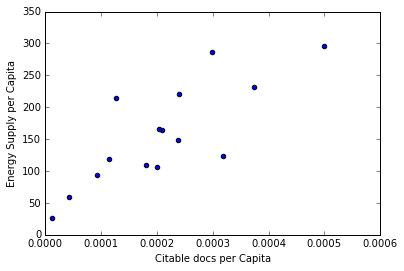

In [127]:
plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [159]:
def answer_ten():
    Top15 = answer_one()
    
    Top15['HighRenew'] = [1 if x >= Top15['% Renewable'].median() else 0 for x in Top15['% Renewable']]
    
    ans = Top15['HighRenew']
    return ans
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [139]:
def answer_twelve():
    Top15 = answer_one()
    
    # importing the dependencies
    import pandas as pd
    import numpy as np
    
    # Creating the dictionaries as stated
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    
    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)
    Top15 = Top15.reset_index()
    
    Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
    X = Top15.set_index('Continent').groupby(level=0)['PopEst'].agg({'size': np.size, 'sum': np.sum, 'mean': np.mean,'std': np.std})
    X = X[['size', 'sum', 'mean', 'std']]
    
    ans = X
    return ans
answer_twelve()

,size,sum,mean,std
Continent,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [143]:
def answer_twelve():
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    Top15 = Top15.reset_index()
    Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
    Top15['bins'] = pd.cut(Top15['% Renewable'],5)

    ans = Top15.groupby(['Continent','bins']).size()
    return ans

answer_twelve()

Continent      bins            
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [155]:
def answer_thirteen():
    
    # import the dependencies
    import pandas as pd
    import locale
    
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
    Top15 = answer_one()
    
    # Population
    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)
    
    map_str = []
    for num in Top15['PopEst']:
        map_str.append(locale.format('%.2f',num,grouping=True))
    Top15['PopEst_str'] = map_str
    
    
    ans = Top15['PopEst_str']

    return ans
answer_thirteen()

Country
China                 1,367,645,161.29
United States           317,615,384.62
Japan                   127,409,395.97
United Kingdom           63,870,967.74
Russian Federation      143,500,000.00
Canada                   35,239,864.86
Germany                  80,369,696.97
India                 1,276,730,769.23
France                   63,837,349.40
South Korea              49,805,429.86
Italy                    59,908,256.88
Spain                    46,443,396.23
Iran                     77,075,630.25
Australia                23,316,017.32
Brazil                  205,915,254.24
Name: PopEst_str, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [156]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


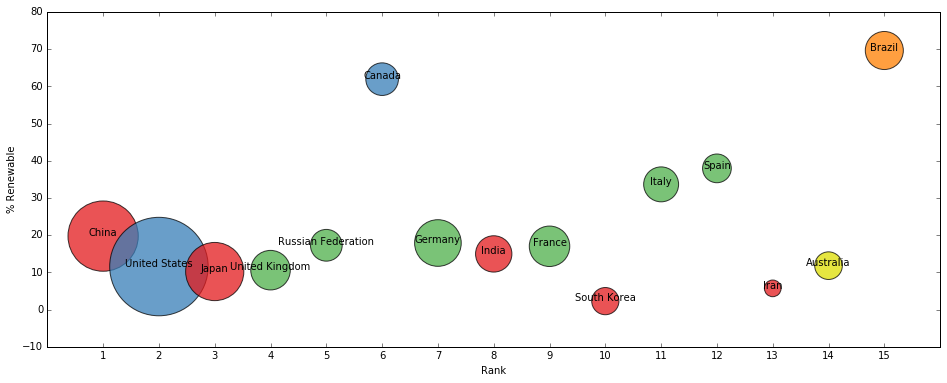

In [157]:
plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!

<a href=\"https://www.coursera.org/learn/python-data-analysis/home/welcome\">Courtesy</a>